# Burgers' Equation

I solve the Burgers’ equation both in its flux conservative formulation and in the non-flux conservative one, using as initial condition a gaussian profile $u(x,t=0)=10\exp{[-(x-x_0)^2]}$ with $x_0=5$. 
The domain is $x \in [0, 10]$ and the final time is set to $t_f = 0.5$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
run_name = 'FC_101points'    # Flux conservative form
#run_name = 'NFC_101points'  # Non flux conservative form

In [3]:
L = 10.0   
nx = 101    
dx = L/(nx-1)
x = np.linspace(0, L, nx)
cf = 0.5
t_final = 0.5

x0=5
u_initial = 10 * np.exp(-(x-x0)**2)

u_current = u_initial.copy()
dt = cf*dx/np.max(u_current)

time=[]
time.append(0.0)

print('nx =',nx)
print('dx =',dx)
print('dt =',dt)
print('Number of iterations =',t_final/dt)

nx = 101
dx = 0.1
dt = 0.005
Number of iterations = 100.0


In [4]:
os.makedirs('./images_' + str(run_name))
os.listdir('./')

['.ipynb_checkpoints',
 'Advection equation',
 "Exercise 1 - Burgers' Equation - Upwind.ipynb",
 'images_FC_101points',
 'Step function']

In [5]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.5)
plt.savefig('./images_' + str(run_name) + '/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:    
    # Flux conservative form
    u_next = u_current - dt/dx * (1/2 * (u_current)**2 - 1/2 * (np.roll(u_current, 1))**2)
    # Non flux conservative form
    #u_next = u_current - dt/dx * (u_current) * (u_current - np.roll(u_current, 1))
    
    u_current = u_next.copy()
    dt = cf*dx/np.max(u_current)
    
    t += dt
    i += 1
    
    time.append(t)
    
    if (i%5==0):
        plt.plot(x, u_current)
        plt.title('Time = '+str(round(t,2)))
        plt.ylim(0,10.5)
        plt.savefig('./images_' + str(run_name) + '/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

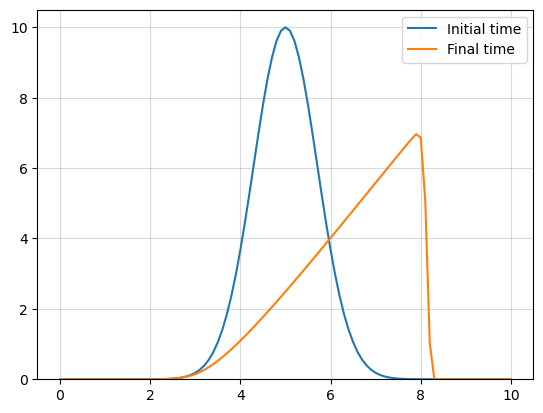

In [6]:
plt.plot(x, u_initial, label='Initial time')
plt.plot(x, u_current, label='Final time')
plt.ylim(0,10.5)
plt.legend()
plt.grid (c='gray', alpha = 0.3)
plt.savefig('init_final_step' + str(run_name) + '.png', dpi=200)